# Infomation about datset 
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


##First things first, Lets try to study the dataset.

In [4]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [8]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
data.shape

(506, 14)

##Great we have no null values!!

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

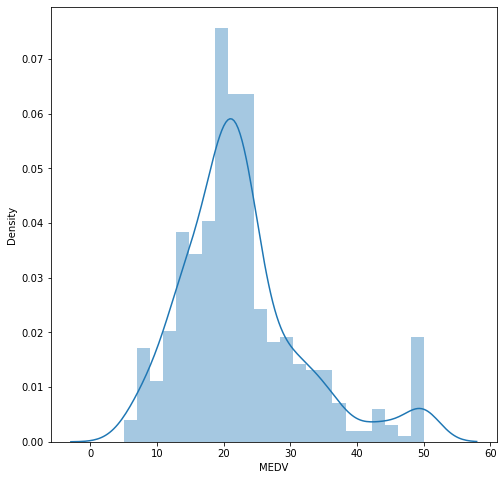

In [10]:
plt.figure(figsize=(8,8))
sns.distplot(data['MEDV'])



##The distplot of our dependent variable 'MEDV' shows its is normally distributed with some outliers to the left.

##Let's try plotting all the independent variables.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CRIM', ylabel='Density'>

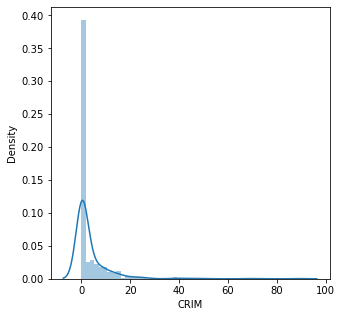

In [11]:
plt.figure(figsize=(5,5))
sns.distplot(data['CRIM'])


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ZN', ylabel='Density'>

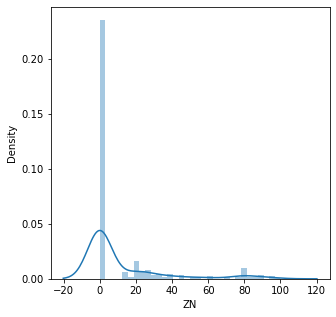

In [12]:
plt.figure(figsize=(5,5))
sns.distplot(data['ZN'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='INDUS', ylabel='Density'>

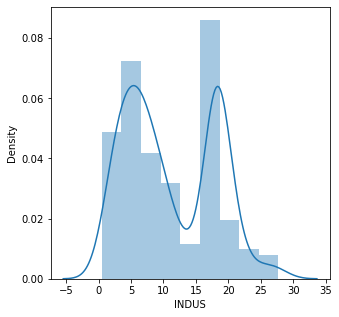

In [13]:
plt.figure(figsize=(5,5))
sns.distplot(data['INDUS'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CHAS', ylabel='Density'>

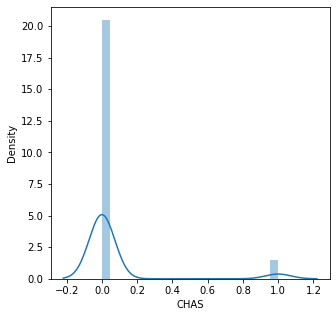

In [14]:
plt.figure(figsize=(5,5))
sns.distplot(data['CHAS'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NOX', ylabel='Density'>

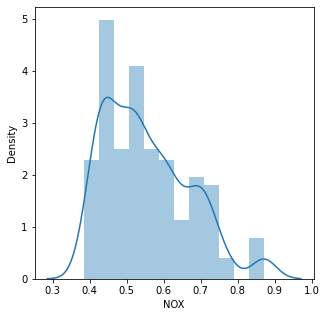

In [15]:
plt.figure(figsize=(5,5))
sns.distplot(data['NOX'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

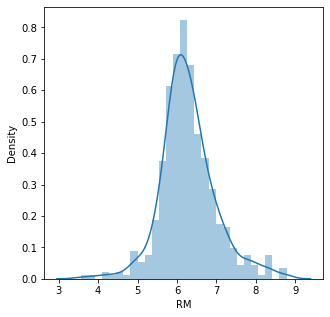

In [16]:
plt.figure(figsize=(5,5))
sns.distplot(data['RM'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

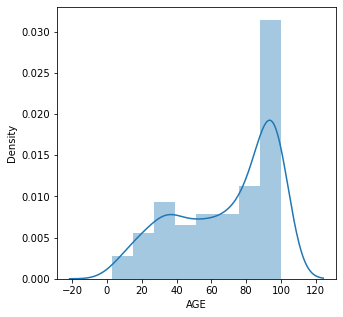

In [17]:
plt.figure(figsize=(5,5))
sns.distplot(data['AGE'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DIS', ylabel='Density'>

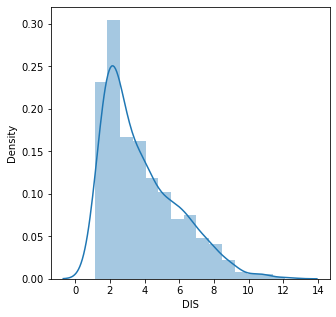

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(data['DIS'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RAD', ylabel='Density'>

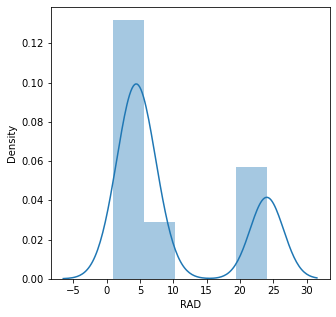

In [19]:
plt.figure(figsize=(5,5))
sns.distplot(data['RAD'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TAX', ylabel='Density'>

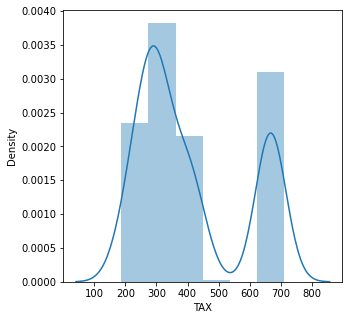

In [20]:
plt.figure(figsize=(5,5))
sns.distplot(data['TAX'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PTRATIO', ylabel='Density'>

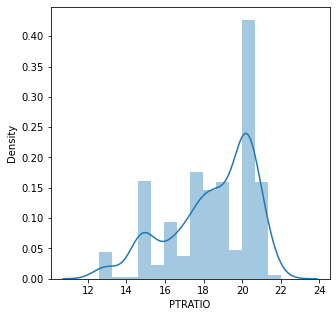

In [21]:
plt.figure(figsize=(5,5))
sns.distplot(data['PTRATIO'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='B', ylabel='Density'>

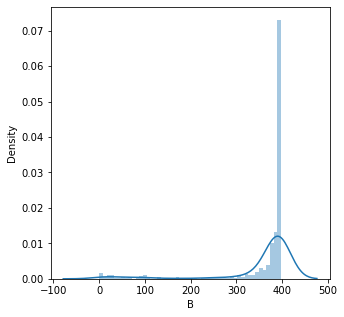

In [22]:
plt.figure(figsize=(5,5))
sns.distplot(data['B'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LSTAT', ylabel='Density'>

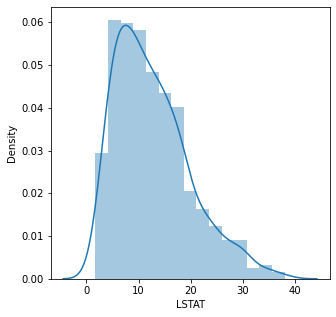

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(data['LSTAT'])

##Lets find the correlation between the dataset.

<AxesSubplot:>

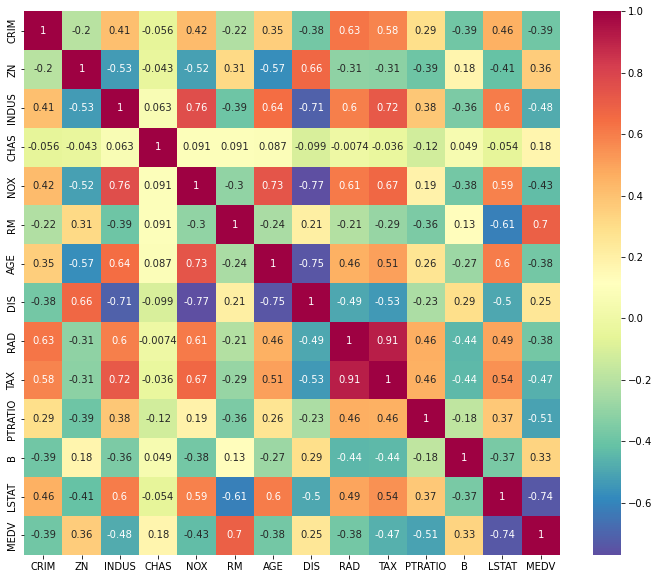

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot= True, cmap='Spectral_r')

##From the above heatmap we can find about the dependent variable MEDV


*   MEDV is positively correlated to RM.
*   MEDV negatively correlated to LSTAT.

##For the independent Variables:


*   TAX-RAD have highest positive correlation. 0.91
*   ZN-INDUS, AGE-DIS have highest negative correlation. -0.53, -0.75





##We know that to find linear regregression the dependent and independent variables must be linearly related.
##Therefor we can use RM and LSTAT for the same and it would be best to avoid TAX,RAD,ZN,INDUS,AGE,DIS. As these columns exhibit multi-co-linearity.





##Lets plot scatter plot between LSTAT and MEDV.

Text(0, 0.5, 'LSTAT')

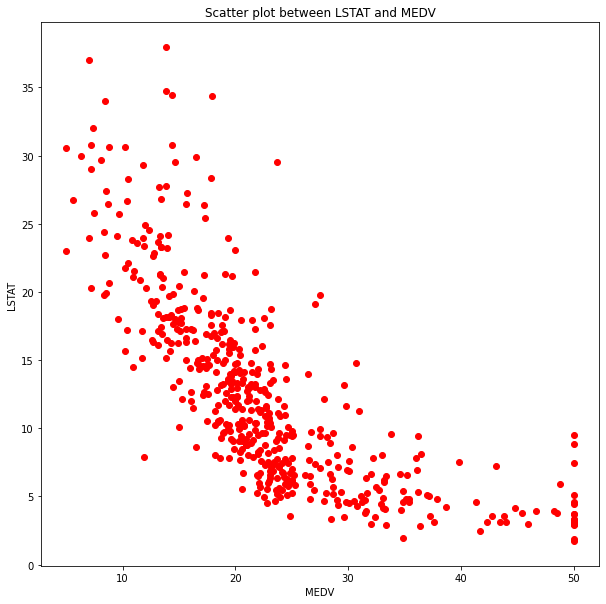

In [25]:
plt.figure(figsize=(10,10))
x = data['MEDV']
y = data['LSTAT']
plt.scatter(x, y,color='red')
plt.title('Scatter plot between LSTAT and MEDV')
plt.xlabel('MEDV')
plt.ylabel('LSTAT')

##The above plot suggests negative linear regression, which seconds the heatmap and makes sense if we see the column we can tell as the % of lower status of the population increases, no. of owner-occupied homes in price range of $1000  would decrease.

##Lets plot scatter plot between RM and MEDV.

Text(0, 0.5, 'RM')

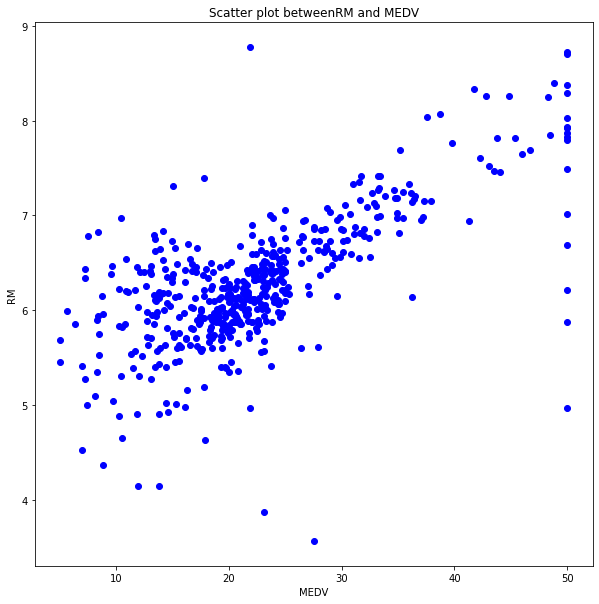

In [26]:
plt.figure(figsize=(10,10))
x = data['MEDV']
y = data['RM']
plt.scatter(x, y,color='blue')
plt.title('Scatter plot betweenRM and MEDV')
plt.xlabel('MEDV')
plt.ylabel('RM')

##The above plot suggests positive linear regression, which again agrees with the heatmap and makes sense if we see the column we can tell as number of rooms per dwelling increase, no. of owner-occupied homes in price range of $1000 would decrease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

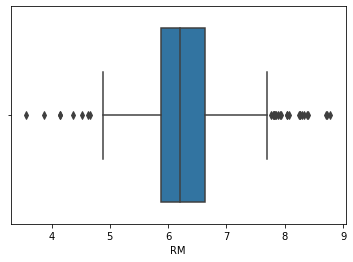

In [27]:
sns.boxplot(data['RM'])

In [28]:
data['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LSTAT'>

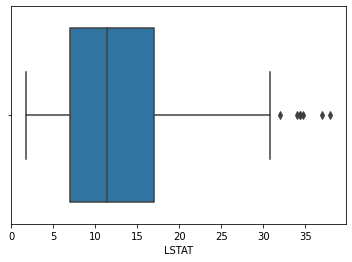

In [29]:
sns.boxplot(data['LSTAT'])

In [30]:
data['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

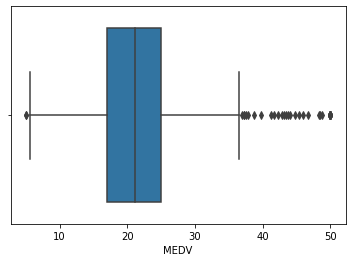

In [31]:
sns.boxplot(data['MEDV'])

In [32]:
data['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

##LSTAT and RM do not consist a lot of outliers too therefore I would say we can easily consider these columns to make any predictions.

Text(0, 0.5, 'PTRATIO')

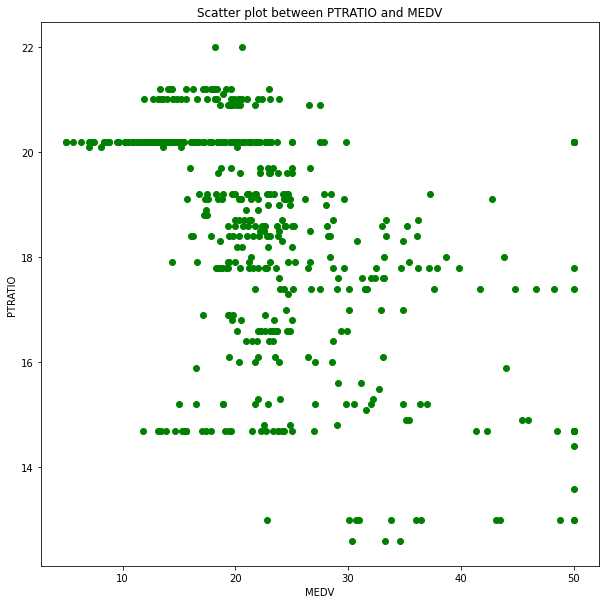

In [33]:
plt.figure(figsize=(10,10))
x = data['MEDV']
y = data['PTRATIO']
plt.scatter(x, y,color='green')
plt.title('Scatter plot between PTRATIO and MEDV')
plt.xlabel('MEDV')
plt.ylabel('PTRATIO')

##PTRATIO is second highest negative correlated value but as per the first assumption, the relation between dependent and independent variables must be linear which is not here.


##Hence to conclude, LSTAT and RM are the best possible independent variables to make any future predictions about our dependent variable MEDV.

##Calculating the best fit line for RM and MEDV.

In [34]:
rmdf={'y':data['MEDV'],'x':data['RM']}
rmdf=pd.DataFrame(rmdf)
rmdf['x2']= rmdf['x']**2
rmdf['xy']= rmdf['x']*rmdf['y']

In [35]:
rmdf.head()

,y,x,x2,xy
0,24.0,6.575,43.230625,157.8000
1,21.6,6.421,41.229241,138.6936
2,34.7,7.185,51.624225,249.3195
3,33.4,6.998,48.972004,233.7332
4,36.2,7.147,51.079609,258.7214


In [36]:
n= len(rmdf['y'])
xys=rmdf['xy'].sum()
xs=rmdf['x'].sum()
ys=rmdf['y'].sum()
s=rmdf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs))
print(b1)

0.11217890985015581


In [37]:
ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print(b0)

21.82780288973075


In [38]:
bestfitl= (b1*x)+b0

<AxesSubplot:title={'center':'Linear regression.'}, xlabel='x', ylabel='y'>

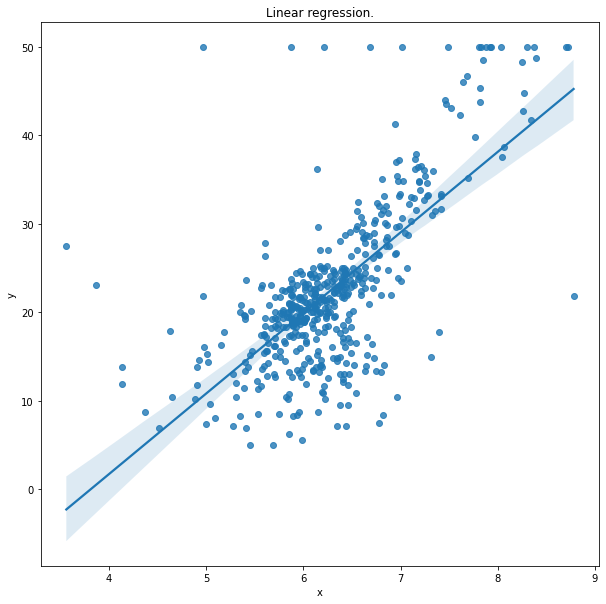

In [39]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('RM')
plt.ylabel('MEDV')
sns.regplot(x=rmdf['x'],y=rmdf['y'])

In [40]:
ldf={'y':data['MEDV'],'x':data['LSTAT']}
ldf=pd.DataFrame(ldf)
ldf['x2']= ldf['x']**2
ldf['xy']= ldf['x']*ldf['y']

In [41]:
n= len(ldf['y'])
xys=ldf['xy'].sum()
xs=ldf['x'].sum()
ys=ldf['y'].sum()
s=ldf['x']**2
x2s=s.sum()
b1= ((n*xys)-(xs*ys))/((n*x2s)-(xs))
print(b1)

-0.22918910438279172


In [42]:
ybar= ys/n
xbar= xs/n
b0=ybar-(b1*xbar)
print(b0)

25.43275055603875


<AxesSubplot:title={'center':'Linear regression.'}, xlabel='x', ylabel='y'>

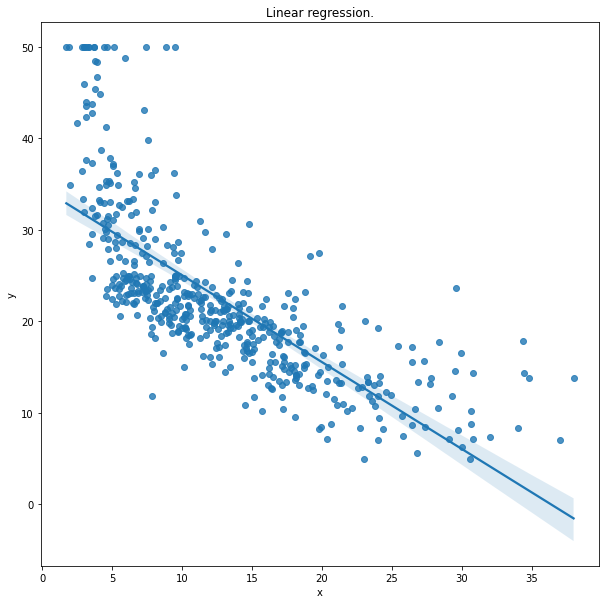

In [43]:
plt.figure(figsize=(10,10))
plt.title('Linear regression.')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
sns.regplot(x=ldf['x'],y=ldf['y'])